In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("social_network_ads.csv")
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df['Gender'] = pd.get_dummies(df['Gender'], drop_first=True)

In [7]:
print(df.isnull().sum())
df = df.dropna()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [14]:
import seaborn as sns


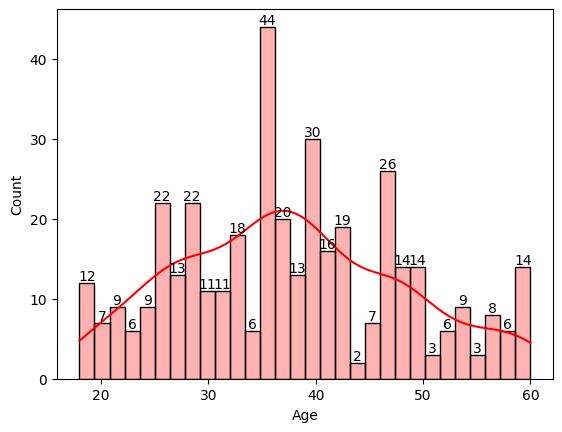

In [21]:
hisplot=sns.histplot(df['Age'],kde=True,bins=30,color='red',alpha=0.3)
for i in hisplot.containers:
    hisplot.bar_label(i)
plt.show()

In [30]:
skewness = df['Age'].skew()
print(skewness)
mean=np.mean(df['Age'])
print(mean)
md=np.median(df['Age'])
print(md)
sd=np.std(df['Age'])
print(sd)
skew=(3*(mean-md))/sd
print(skew)

0.23133746309642822
37.655
37.0
10.46976480156073
0.18768329921863006


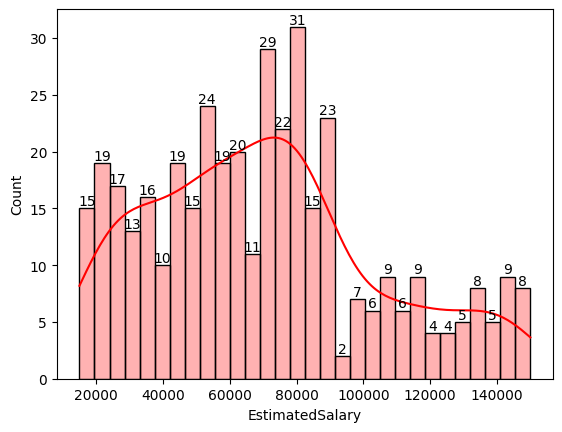

In [22]:
hisplot=sns.histplot(df['EstimatedSalary'],kde=True,bins=30,color='red',alpha=0.3)
for i in hisplot.containers:
    hisplot.bar_label(i)
plt.show()

In [24]:
skewness = df['EstimatedSalary'].skew()
print(skewness)

0.49502362888993623


In [32]:
count=df['Purchased'].count()
print(count)

400


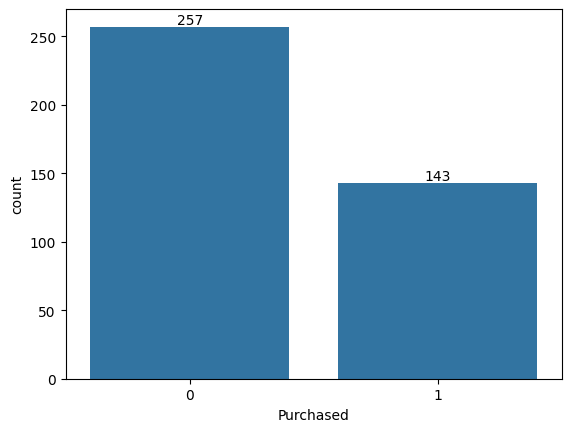

In [36]:
countplot=sns.countplot(x='Purchased',data=df)
for i in countplot.containers:
    countplot.bar_label(i)
plt.show()

In [41]:
pip install --upgrade seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Program Files\Python312\python.exe -m pip install --upgrade pip


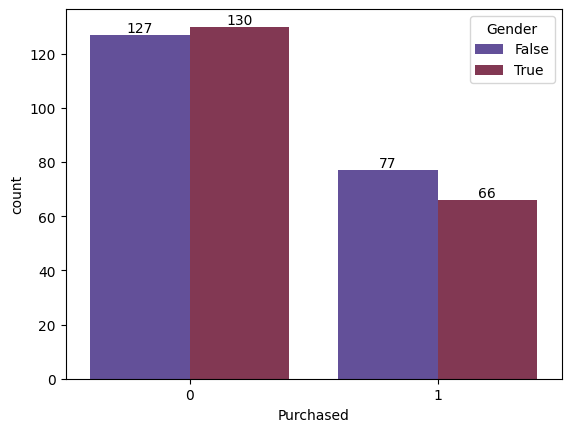

In [44]:
countplot = sns.countplot(x='Purchased', hue='Gender', data=df ,palette='twilight')
for i in countplot.containers:
    countplot.bar_label(i)
plt.show()

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x=df[['Age','EstimatedSalary']]
y=df['Purchased']
scaler=StandardScaler()
x=scaler.fit_transform(x)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2, random_state=42)

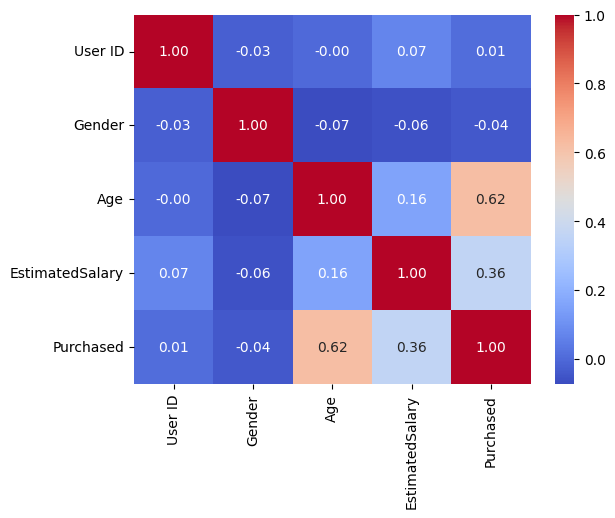

In [48]:
heatmap= df.corr()
sns.heatmap(heatmap, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()